<div style="font-size:18pt;padding-top:20px; text-align:center">Домашнее задание 1. <b>Дескриптивный анализ данных</b> </div><hr>
<div style="text-align:right;">Куценко А. А <span style="font-style: italic;font-weight: bold;">(ftruf357ft@gmail.com)</span></div>

Подключение стилей оформления

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

# Цель работы
Приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.

# Вариант

In [2]:
surname = "Куценко"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  1
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  3


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI) (6 баллов)

### Условие

В качестве индикатора далее необходимо использовать контроль над коррупцией (Control of Corruption) и его показатели `pctrank` и `estimate`.
- Наборы данных:
    - [WGI](https://www.worldbank.org/content/dam/sites/govindicators/doc/wgidataset_excel.zip)
    - [Регионы](https://github.com/MLMethods/Assignments/blob/master/data/A1_Descriptive_Analysis/regions.xlsx)
- [Описание WGI](http://info.worldbank.org/governance/wgi/)

> **Замечание**. Исходный файл с данными редактировать нельзя.

Порядок работы:
1. Загрузите данные в DataFrame
2. Отсортируйте данные по убыванию `pctrank`
3. Отобразите данные по индексу WGI за 2023 год в виде горизонтального столбчатого графика (`pctrank`). Примерный вид графика приведен ниже.
   ![Сортировка WGI по Control of Corruption](https://github.com/MLMethods/Assignments/blob/master/docs/img/cpi_2016_.png?raw=true)
4. Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом
5. Выведите данные DataFrame'a
6. Постройте графики индекса WGI за 1996-2023 для стран своего региона (`estimate`). Примерный вид графика приведен ниж
   ![WGI для стран из региона](https://github.com/MLMethods/Assignments/blob/master/docs/img/fig_springfield_region.png?raw=true)
7. Найдите страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2023 год (estimate)
   > **Замечание**. У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса
8. Определите средние значения региона за каждый год в период с 1996 по 2023 (`estimate`)
9. Постройте графики индекса WGI за 1996-2023 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2023 год, а также отобразите среднее значение по региону и РФ. Примерный вид графика:
    ![WGI среднее, максимальное, минимальное и по РФ](https://github.com/MLMethods/Assignments/blob/master/docs/img/fig_springfield_region_comb.png?raw=true)
10. Определите, как изменилось значение показателя rank с 1996 по 2023 (`rank`)
11. Выведите таблицу для Вашего варианта (WGI - `rank`)
12. Отобразите диаграмму размаха (`boxplot`) индекса WGI за 2023 для всех стран и для каждого региона в отдельности (на одном графике) (`estimate`)

### Выполнение

In [3]:
# Базовый уровень бытия
import os
import numpy as np
import pandas as pd

Проверяем наличие датасета локально, если его нет, то скачиваем

In [4]:
%%bash

# Messages from utils in stderr is not an errros
exec 2>&1

datasets_path="../data/A1_DA_dataset"
wgi_path="wgidataset"
wgi_file="wgidataset.xlsx"
regions_file="regions.xlsx"

echo "Let's check the availability of the dataset locally"

if [ ! -f ${datasets_path}/${wgi_path}/${wgi_file} ] || [ ! -f ${datasets_path}/${wgi_path}/${regions_file} ] ;then
    echo "Dataset files are missing. Downloading..."
    mkdir -p ${datasets_path}/${wgi_path}

    pushd ${datasets_path}

    echo "Downloading dataset"
    curl -s "https://www.worldbank.org/content/dam/sites/govindicators/doc/wgidataset_excel.zip" -o ${wgi_path}.zip
    unzip ${wgi_path}.zip -d ${wgi_path}
    rm ${wgi_path}.zip

    echo "Downloading regions"
    curl -sL "https://github.com/MLMethods/Assignments/raw/refs/heads/master/data/A1_Descriptive_Analysis/regions.xlsx" -o ${wgi_path}/${regions_file}

    popd
else
    echo "Dataset files exist. I'm skipping the download"
fi


Let's check the availability of the dataset locally
Dataset files are missing. Downloading...
/home/alexander/Programming/ML/MY/mlassignments/data/A1_DA_dataset /home/alexander/Programming/ML/MY/mlassignments/notebooks
Archive:  wgidataset.zip
  inflating: wgidataset/wgidataset.xlsx  
  inflating: wgidataset/readme.pdf   
/home/alexander/Programming/ML/MY/mlassignments/notebooks


1. Подгружаем датасет

In [5]:
dataset_path = '../data/A1_DA_dataset/wgidataset/wgidataset.xlsx'

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f'File with dataset {dataset_path} not found!')

# Empty values in the dataset are marked as ".."
dataset_frame = pd.read_excel(dataset_path, na_values=['..'])

dataset_frame

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3.0,19.354839,2.688172,43.010754
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4.0,33.333332,16.666666,52.688171
3,ASMcc1996,ASM,American Samoa,1996,cc,NaN,NaN,NaN,NaN,NaN,NaN
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1.0,87.096771,72.043015,96.774193
...,...,...,...,...,...,...,...,...,...,...,...
32095,VIRva2023,VIR,Virgin Islands (U.S.),2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32096,WBGva2023,WBG,West Bank and Gaza,2023,va,-1.118067,0.149837,6.0,18.137255,11.764706,24.509804
32097,YEMva2023,YEM,"Yemen, Rep.",2023,va,-1.550217,0.131432,8.0,6.372549,2.450980,11.764706
32098,ZMBva2023,ZMB,Zambia,2023,va,-0.047946,0.118482,12.0,45.098038,39.215687,52.450981


2. Отсортируем по убыванию значения `pctrank`

In [6]:
dataset_frame.sort_values('pctrank', ascending=0)

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
383,SGPge1996,SGP,Singapore,1996,ge,1.993047,0.168259,5.0,100.0,91.256828,100.0
1667,SGPge1998,SGP,Singapore,1998,ge,2.072397,0.205460,5.0,100.0,91.256828,100.0
17907,NORva2012,NOR,Norway,2012,va,1.728163,0.131552,13.0,100.0,96.244133,100.0
27989,SGPrq2020,SGP,Singapore,2020,rq,2.205299,0.208772,8.0,100.0,99.047623,100.0
4877,SGPrq2002,SGP,Singapore,2002,rq,1.888891,0.208489,7.0,100.0,92.972977,100.0
...,...,...,...,...,...,...,...,...,...,...,...
32008,MTQva2023,MTQ,Martinique,2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32024,ANTva2023,ANT,Netherlands Antilles (former),2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32029,NIUva2023,NIU,Niue,2023,va,NaN,NaN,NaN,NaN,NaN,NaN
32047,REUva2023,REU,Réunion,2023,va,NaN,NaN,NaN,NaN,NaN,NaN


3. Из всего датасета нас интересует показатель `Control of Corruption`, обозначенный в поле `indicator` как `cc`. График нужно построить за 2023 год  

In [7]:
# Датафрейм с строками для cc и 2023 годом (NaN значение не отрисовываем)
wgi_cc_2023_frame = dataset_frame\
                    .query('indicator == "cc" and year == 2023')\
                    .filter(items=['countryname', 'year', 'indicator', 'pctrank'])\
                    .dropna()
wgi_cc_2023_frame

,countryname,year,indicator,pctrank
30816,Afghanistan,2023,cc,13.679245
30817,Albania,2023,cc,43.396225
30818,Algeria,2023,cc,30.188679
30819,American Samoa,2023,cc,87.735847
30820,Andorra,2023,cc,87.735847
...,...,...,...,...
31025,Virgin Islands (U.S.),2023,cc,53.301888
31026,West Bank and Gaza,2023,cc,26.415094
31027,"Yemen, Rep.",2023,cc,1.886792
31028,Zambia,2023,cc,36.792454


In [8]:
wgi_cc_2023_pctranks = wgi_cc_2023_frame['pctrank'].unique()
wgi_cc_2023_pctranks = np.flip(np.sort(wgi_cc_2023_pctranks, axis=-1))

# Получили отсортированный по убыванию массив уникальных значений pctrank
wgi_cc_2023_pctranks

array([100.        ,  99.52830505,  99.05660248,  98.58490753,
        98.11320496,  97.64151001,  97.16981506,  96.69811249,
        96.22641754,  95.75471497,  95.28302002,  94.81131744,
        94.3396225 ,  93.86792755,  93.39622498,  92.92453003,
        92.45282745,  91.98113251,  91.50943756,  91.03773499,
        90.56604004,  90.09433746,  89.62264252,  89.15093994,
        88.679245  ,  88.20755005,  87.73584747,  84.43395996,
        83.96226501,  83.49056244,  83.01886749,  82.54717255,
        82.07546997,  81.13207245,  80.6603775 ,  80.18868256,
        79.71697998,  79.24528503,  78.77358246,  78.30188751,
        77.83018494,  77.35848999,  76.88679504,  76.41509247,
        75.94339752,  75.47169495,  75.        ,  74.52830505,
        74.05660248,  73.58490753,  73.11320496,  72.64151001,
        72.16981506,  71.69811249,  71.22641754,  70.75471497,
        69.81131744,  68.86792755,  68.39622498,  67.92453003,
        67.45282745,  66.98113251,  66.50943756,  66.03

In [9]:
# каждому уникальному значению из wgi_cc_2023_pctranks соответствует положение в рейтинге
position_in_rating = {}
counter = 1
for value in wgi_cc_2023_pctranks:
    position_in_rating[value] = counter
    counter += 1

In [10]:
position_in_rating

{100.0: 1,
 99.52830505371094: 2,
 99.05660247802734: 3,
 98.58490753173828: 4,
 98.11320495605469: 5,
 97.64151000976562: 6,
 97.16981506347656: 7,
 96.69811248779297: 8,
 96.2264175415039: 9,
 95.75471496582031: 10,
 95.28302001953125: 11,
 94.81131744384766: 12,
 94.3396224975586: 13,
 93.86792755126953: 14,
 93.39622497558594: 15,
 92.92453002929688: 16,
 92.45282745361328: 17,
 91.98113250732422: 18,
 91.50943756103516: 19,
 91.03773498535156: 20,
 90.5660400390625: 21,
 90.0943374633789: 22,
 89.62264251708984: 23,
 89.15093994140625: 24,
 88.67924499511719: 25,
 88.20755004882812: 26,
 87.73584747314453: 27,
 84.4339599609375: 28,
 83.96226501464844: 29,
 83.49056243896484: 30,
 83.01886749267578: 31,
 82.54717254638672: 32,
 82.07546997070312: 33,
 81.13207244873047: 34,
 80.6603775024414: 35,
 80.18868255615234: 36,
 79.71697998046875: 37,
 79.24528503417969: 38,
 78.7735824584961: 39,
 78.30188751220703: 40,
 77.83018493652344: 41,
 77.35848999023438: 42,
 76.88679504394531: 

In [11]:
# Новый столбец в датафрейме с позицией в рейтинге за 2023 год
wgi_cc_2023_position_values = []

for index, row in wgi_cc_2023_frame.iterrows():
    position_value = position_in_rating[row.pctrank]
    wgi_cc_2023_position_values.append(position_value)

wgi_cc_2023_frame['position'] = wgi_cc_2023_position_values

wgi_cc_2023_frame.sort_values('position', ascending=1)

,countryname,year,indicator,pctrank,position
30868,Denmark,2023,cc,100.000000,1
30881,Finland,2023,cc,99.528305,2
30961,Norway,2023,cc,99.056602,3
30955,New Zealand,2023,cc,98.584908,4
30985,Singapore,2023,cc,98.113205,5
...,...,...,...,...,...
31027,"Yemen, Rep.",2023,cc,1.886792,199
31023,"Venezuela, RB",2023,cc,1.415094,200
30989,Somalia,2023,cc,0.943396,201
31001,Syrian Arab Republic,2023,cc,0.471698,202


In [12]:
# продвинутый уровень бытия
import matplotlib.pyplot as plt

In [13]:
# Значения и подписи на будущей гистограмме
countries_cc_values = []
countries_names = []

for index, row in wgi_cc_2023_frame\
                    .sort_values('position', ascending=0)\
                    .iterrows():
    countries_names.append(f'{row.position}.{row.countryname}')
    countries_cc_values.append(row.pctrank)
    print(f'{countries_names[-1]}:{countries_cc_values[-1]}')


203.South Sudan:0.0
202.Syrian Arab Republic:0.4716981053352356
201.Somalia:0.9433962106704712
200.Venezuela, RB:1.4150943756103516
199.Yemen, Rep.:1.8867924213409424
198.Korea, Dem. Rep.:2.358490467071533
197.Equatorial Guinea:2.830188751220703
196.Burundi:3.301886796951294
195.Libya:3.7735848426818848
194.Sudan:4.245283126831055
193.Chad:4.716980934143066
192.Congo, Dem. Rep.:5.188679218292236
191.Eritrea:5.660377502441406
190.Haiti:6.132075309753418
189.Turkmenistan:6.603773593902588
188.Nicaragua:7.075471878051758
187.Tajikistan:7.5471696853637695
186.Congo, Rep.:8.018867492675781
185.Iraq:8.49056625366211
184.Central African Republic:8.962264060974121
183.Cambodia:9.433961868286133
182.Zimbabwe:9.905660629272461
181.Iran, Islamic Rep.:10.377358436584473
180.Lebanon:10.849056243896484
179.Kyrgyz Republic:11.320755004882812
178.Myanmar:11.792452812194824
177.Azerbaijan:12.264150619506836
176.Guinea-Bissau:12.735849380493164
175.Cameroon:13.207547187805176
174.Afghanistan:13.67924499

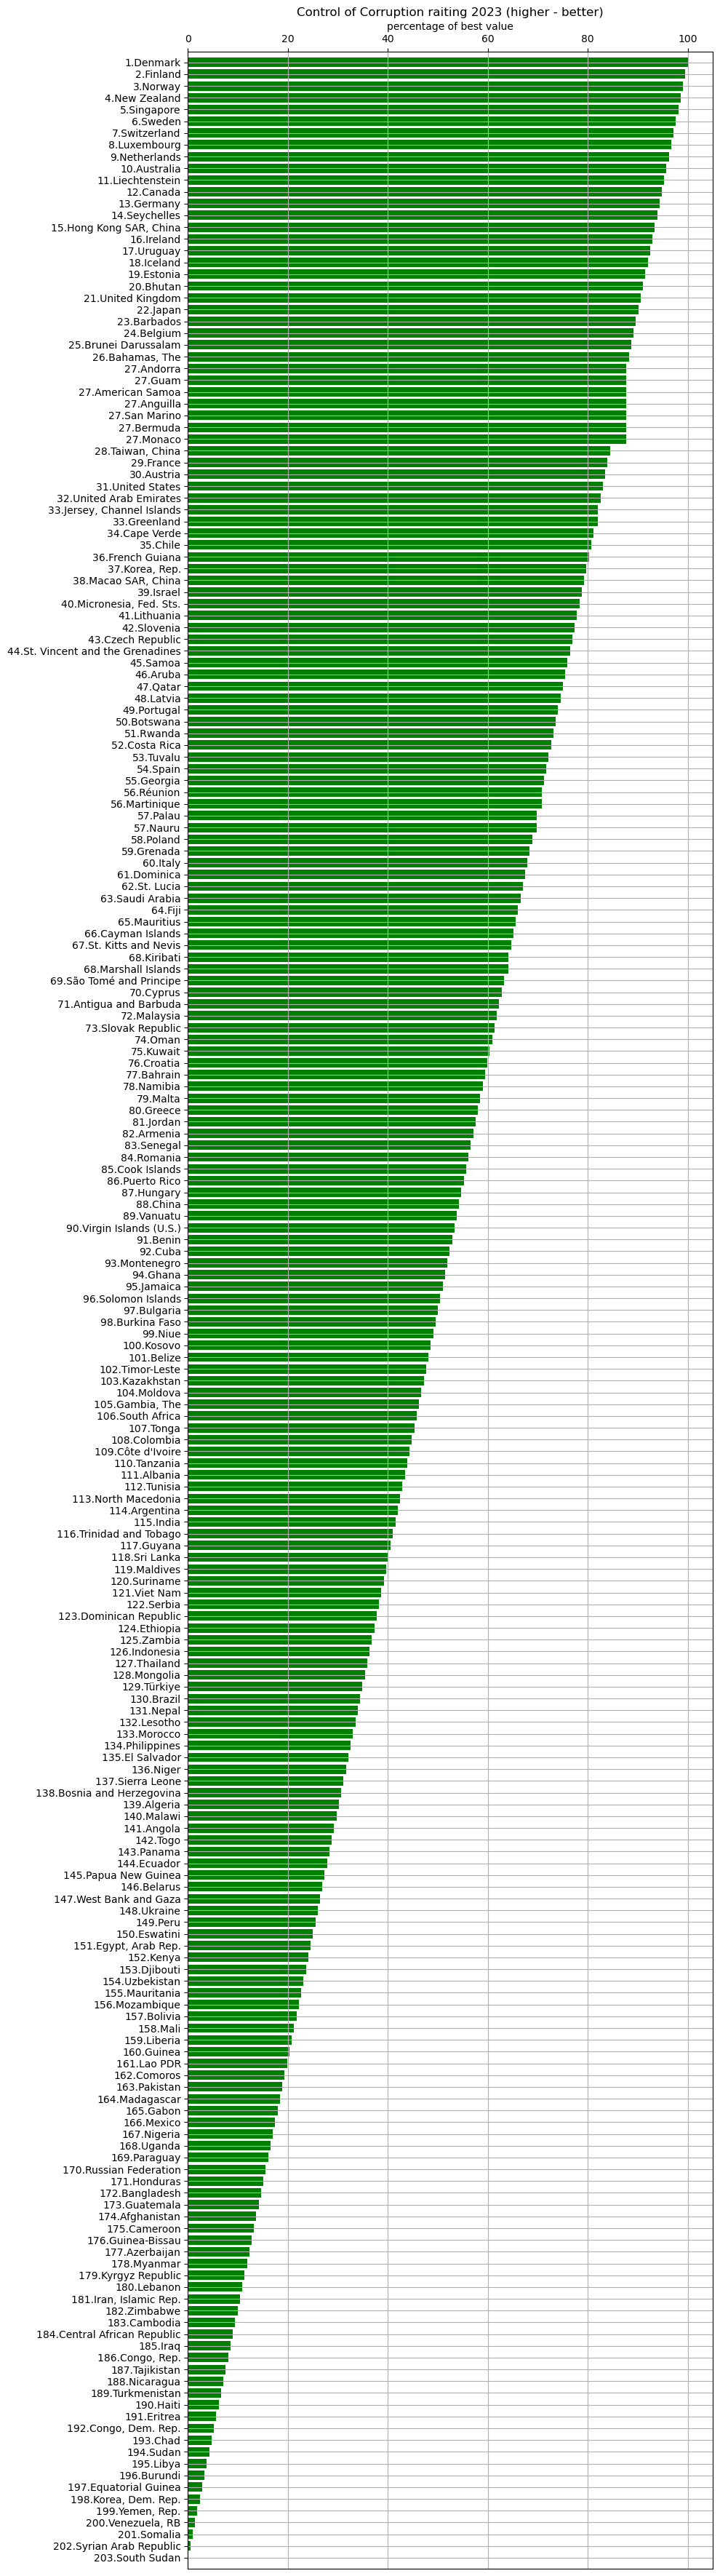

In [14]:
plt.figure('pctrank raiting', figsize=[10, len(countries_names) / 6]) # чем больше высота, тем более различимы значения
plt.title('Control of Corruption raiting 2023 (higher - better)')
plt.barh(countries_names, countries_cc_values, color='green')

ax = plt.gca()              # текущая ось
ax.margins(y = 0.0025)      # уменьшаем вертикальный отступ в %
ax.xaxis.set_label_text('percentage of best value')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.tight_layout()
plt.grid(True)


plt.show()

4. Для варианта 1 регион - Asia Pacific

In [263]:
import math

In [264]:
regions_path = '../data/A1_DA_dataset/wgidataset/regions.xlsx'

if not os.path.exists(regions_path):
    raise FileNotFoundError(f'File with dataset {regions_path} not found!')
    
regions_frame = pd.read_excel(regions_path, na_values=['..'])

# Исправляем неправильные названия стран для Азии
names = {
    # wrong        : right
    'Hong Kong'    : 'Hong Kong SAR, China',
    'Korea, North' : 'Korea, Dem. Rep.',
    'Korea, South' : 'Korea, Rep.',
    'Laos'         : 'Lao PDR',
    'Taiwan'       : 'Taiwan, China',
    'Timor-Leste'  : 'Timor-Leste',
    'Vietnam'      : 'Viet Nam',
}

for wrong, right in names.items():
    regions_frame.loc[regions_frame['Country'] == f'{wrong}', 'Country'] = f'{right}'

regions_frame

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
...,...,...,...
175,Venezuela,VEN,AME
176,Viet Nam,VNM,AP
177,Yemen,YEM,MENA
178,Zambia,ZMB,SSA


Список наименований стран с регионом AP (Asia Pacific):

In [265]:
asia_pacific_countries = regions_frame.query('Region == "AP"').filter(items=['Country', 'Region'])
# asia_pacific_countries.sort_values('Country')

5. Вот все данные из исходного датасета для стран из региона Asia Pacific

In [266]:
asia_pacific_frame = dataset_frame[\
                        dataset_frame.countryname.isin(asia_pacific_countries.Country)\
                    ].query('indicator == "cc"').dropna()
asia_pacific_frame

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355
11,AUScc1996,AUS,Australia,1996,cc,1.877356,0.210325,6.0,93.548386,90.322578,99.462364
16,BGDcc1996,BGD,Bangladesh,1996,cc,-0.969682,0.262077,4.0,17.741936,2.688172,34.946236
23,BTNcc1996,BTN,Bhutan,1996,cc,0.942838,0.340507,2.0,81.182793,66.129036,90.322578
32,KHMcc1996,KHM,Cambodia,1996,cc,-1.019842,0.275614,3.0,16.129032,2.150538,32.795700
...,...,...,...,...,...,...,...,...,...,...,...
31003,TWNcc2023,TWN,"Taiwan, China",2023,cc,1.203369,0.178170,9.0,84.433960,79.716980,90.566040
31006,THAcc2023,THA,Thailand,2023,cc,-0.489051,0.160341,10.0,35.849056,24.056604,48.113209
31007,TMPcc2023,TMP,Timor-Leste,2023,cc,-0.226704,0.207288,7.0,47.641510,31.132076,58.962265
31022,VUTcc2023,VUT,Vanuatu,2023,cc,-0.014865,0.257371,6.0,53.773586,38.207546,63.207546


In [267]:
# Новый датафрейм для будущего графика, первый столбец - наименование страны, второй и далее - показатель cc за год 1996...2023
asia_pacific_cc = pd.DataFrame(data=asia_pacific_countries.Country)

for year in range(1996, 2024):
    year_data = []
    for country in asia_pacific_countries.Country:
        value = asia_pacific_frame\
                    .query(f'countryname == "{country}" and year == {year}')\
                    .filter(items=['estimate'])
        if value.empty:
            year_data.append(math.nan)
        else:
            year_data.append(value.iloc[0,0])
    asia_pacific_cc[f'{year}'] = year_data
    
asia_pacific_cc = asia_pacific_cc.dropna(axis=1, how='all')

In [302]:
years = [int(year) for year in asia_pacific_cc.columns[1:-1]]

asia_pacific_cc_graph = asia_pacific_cc.copy()
asia_pacific_cc_graph.set_index('Country', inplace=True)
asia_pacific_cc_graph = asia_pacific_cc_graph.T

asia_pacific_cc_graph.plot(kind='line',\
                           marker='o',\
                           markersize=15,\
                           figsize=[len(years) * 1.5, len(asia_pacific_countries)],\
                           linewidth=5, colormap)

# Настройка графика
ax = plt.gca()              # текущая ось
plt.title("Control of Corruption raiting from 1996 to 2023 (higher - better)", fontdict={'fontsize': 32})
plt.xlabel("Year", fontdict={'fontsize': 32})
plt.ylabel("Value", fontdict={'fontsize': 32})
plt.legend(title="Country", loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=8, shadow=True, fontsize=24, title_fontsize=32)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.grid(True)
plt.tight_layout()

plt.show()

NameError: name 'gray' is not defined

In [269]:
years = [int(year) for year in asia_pacific_cc.columns[1:-1]]
years

[1996,
 1998,
 2000,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]